<a href="https://colab.research.google.com/github/majorquev/DBDC_202409_Programacion_en_R_para_ciencia_de_datos/blob/main/Clases/C5/00_Ejemplos_adicionales_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplos adicionales ggplot2

**Autor:** Miguel Jorquera Viguera.<br>
**E-mail:** majorquev@gmail.com<br>
**Ayudante:** Rodrigo Morales<br>
**E-mail ayudante:** rumorale1@gmail.com

In [3]:
#install.packages("nycflights13")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(ggplot2)
library(dplyr)
library(nycflights13)


## `stat_bin()`: Permite generar bines en la data y visualizar etiquetas entre otros elementos

1.- Creamos un histograma con 10 bins, y visualizaremos los conteos en etiquetas sobre cada barra del histograma. Para ello considerar a función `stat_bin` con parámetros `geom = 'label'`, y `mapping = aes(label=..count..)`.

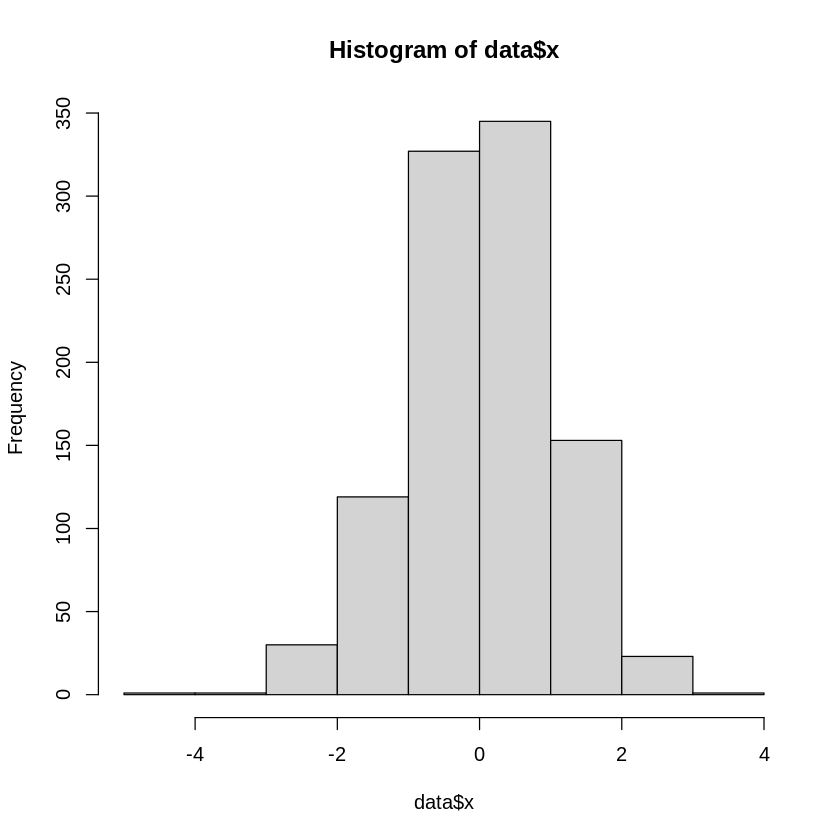

In [5]:
# Histograma de frecuencias absolutas
set.seed(15)
data <- data.frame(x = rnorm(1000))

hist(data$x, breaks = 10)




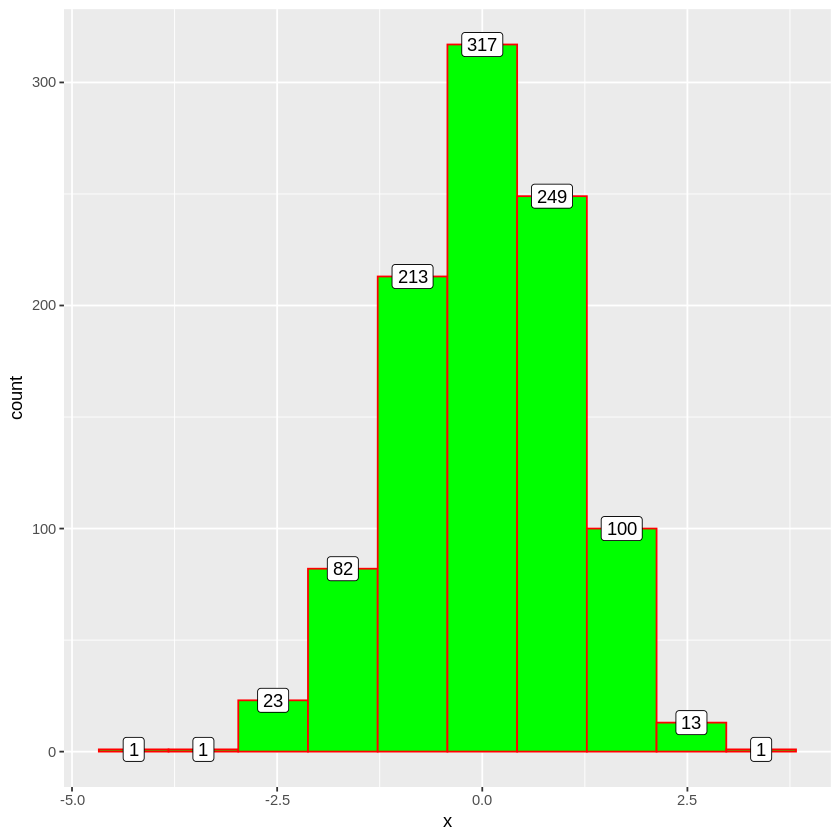

In [6]:
# Incluimos etiquetas en las barras de nuestro histograma de frecuencias absolutas
data %>%
  ggplot() +
  aes(x = x) +
  geom_histogram(
    bins = 10,
    fill = "green",
    color = "red"
  ) +
  stat_bin(
    bins = 10,
    geom = "label",
    mapping = aes(label = after_stat(count) )
  )

2.- Misma Visualización pero con histograma de densidades.

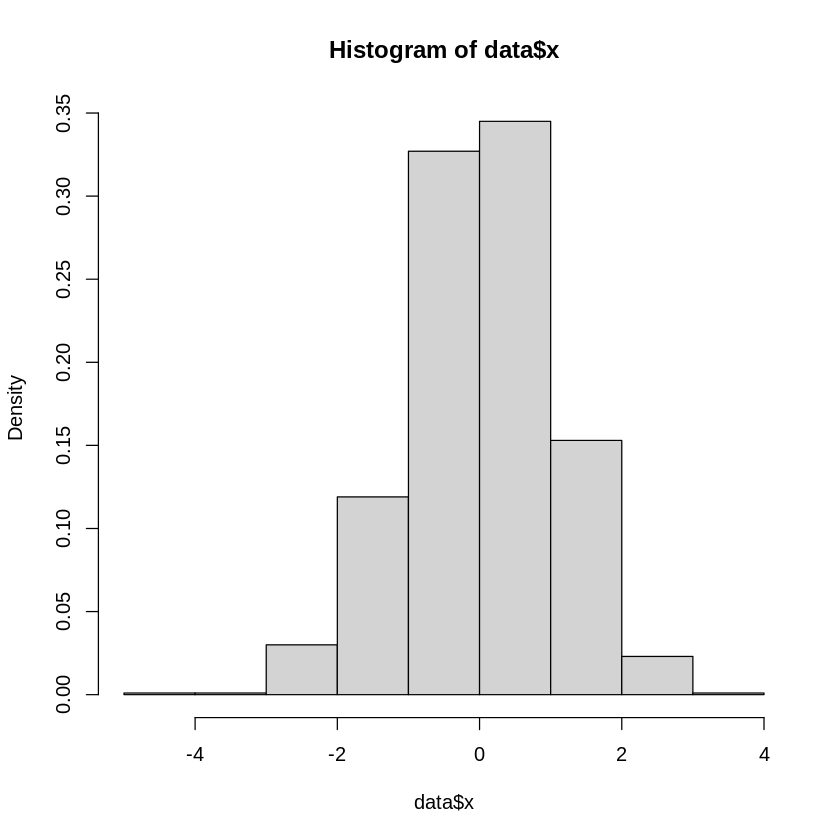

In [8]:
# R base
hist(data$x, breaks = 10, freq = F) # freq = T

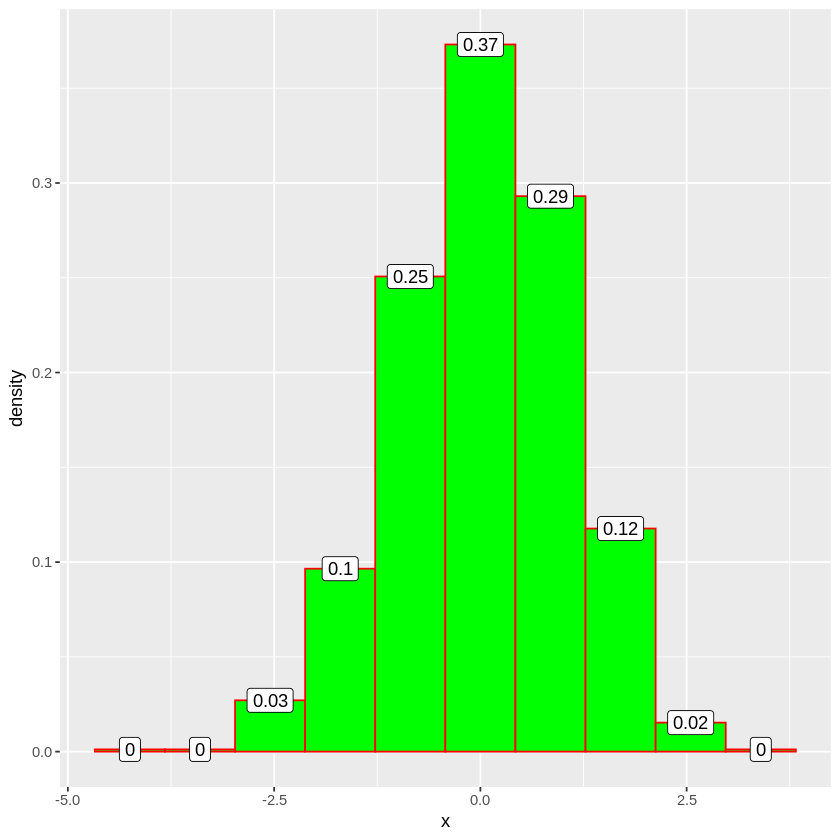

In [9]:
# Adicionalmente, si se quiere mostrar el histograma de frecuencia --------
#  es lo mismo pero se añade y = after_stat(density) en el maepo estético del histograma
data %>%
  ggplot() +
  aes(x = x, y = after_stat(density)) +
  geom_histogram(
    bins = 10,
    fill = "green",
    color = "red"
  ) +
  stat_bin(
    bins = 10,
    geom = "label",
    mapping = aes(label = round(after_stat(density),2) )
  )



## `theme()`: Permite modificar diversos parámetros gráficos, en particualar la orientación de los ejes.

En este ejemplo consideraremos la data de vuelos, para o cual buscaremos visualizar la serie que contiene el total de vuelos por cada día.
Adicionalmente modificaremos la orientación de las etiquetas del eje X mediante la función `theme()`.

In [10]:
?theme

In [11]:

# Orientación etiquetas ejes ----------------------------------------------
data(flights)
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


In [12]:
resumen <- flights %>%
  mutate(fecha = as.Date(time_hour)) %>%
  group_by(fecha) %>%
  summarise(total_vuelos = n()) %>%
  filter(fecha < "2014-01-01")



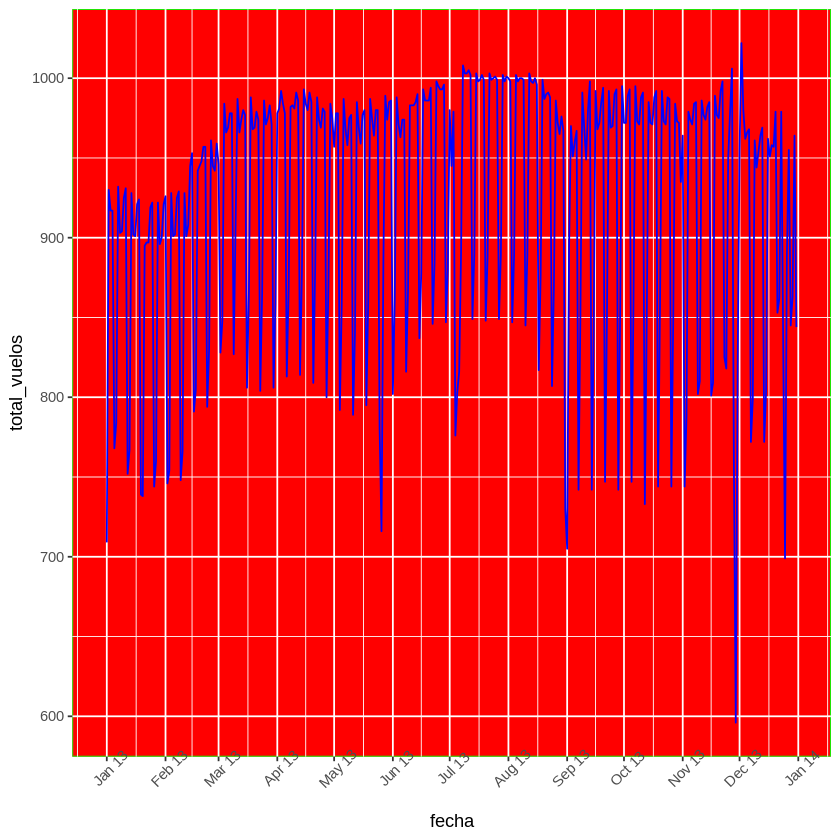

In [13]:

# A modo de ejemplo podemos visulizar el total de vuelos por día .
resumen %>%
  ggplot() +
  aes(x = fecha, y = total_vuelos) +
  geom_line(color = "blue") +
  theme(
    panel.background = element_rect(fill = "red", color = "green"),
    axis.text.x = element_text(angle = 45)
  ) +
  scale_x_date(date_breaks =  "1 month", date_labels = "%b %y")

# La función element_text() permite modificar orientación, y ajste vertical y hoizontal


## `geom_label()`: Al igual que `geom_text()`, permite añadir etiquetas en la visualización, sin la necesidad de generar manualmente los bins.

### Primero: Función `geom_bar()`

1- Construir un gráfico de barras con el total de vuelos por cada carrier.


2- Construir un gráfico de barras con el total de vuelos por cada carrier, pero considerando un dataframe con los conteos ya calculados.

In [14]:
data(flights)

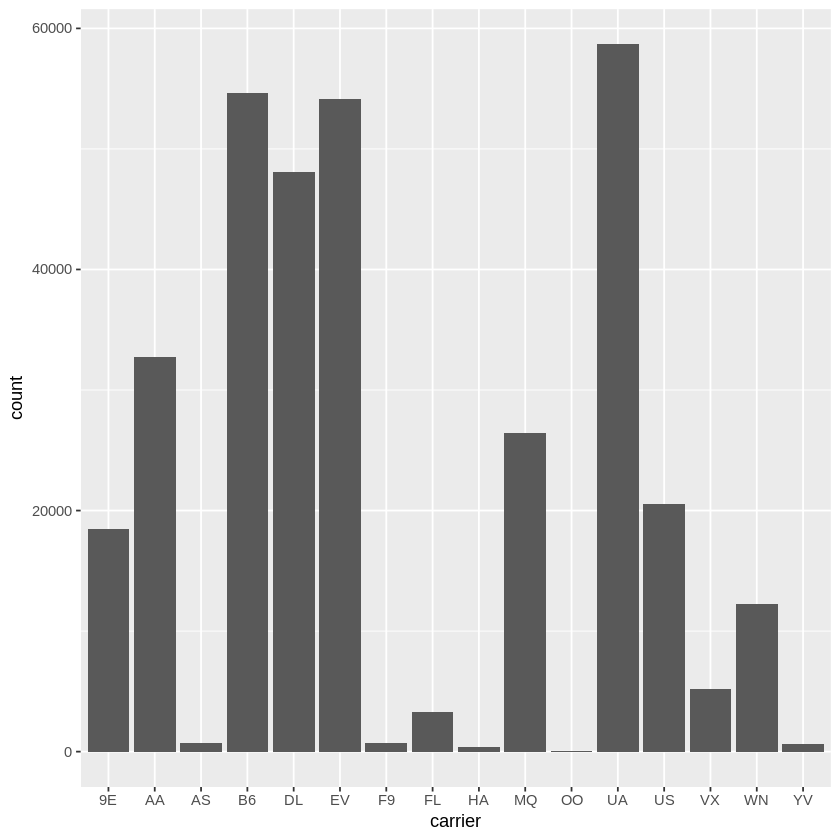

In [15]:
# OP 1
flights %>%
  ggplot() +
  aes(x = carrier) +
  geom_bar()


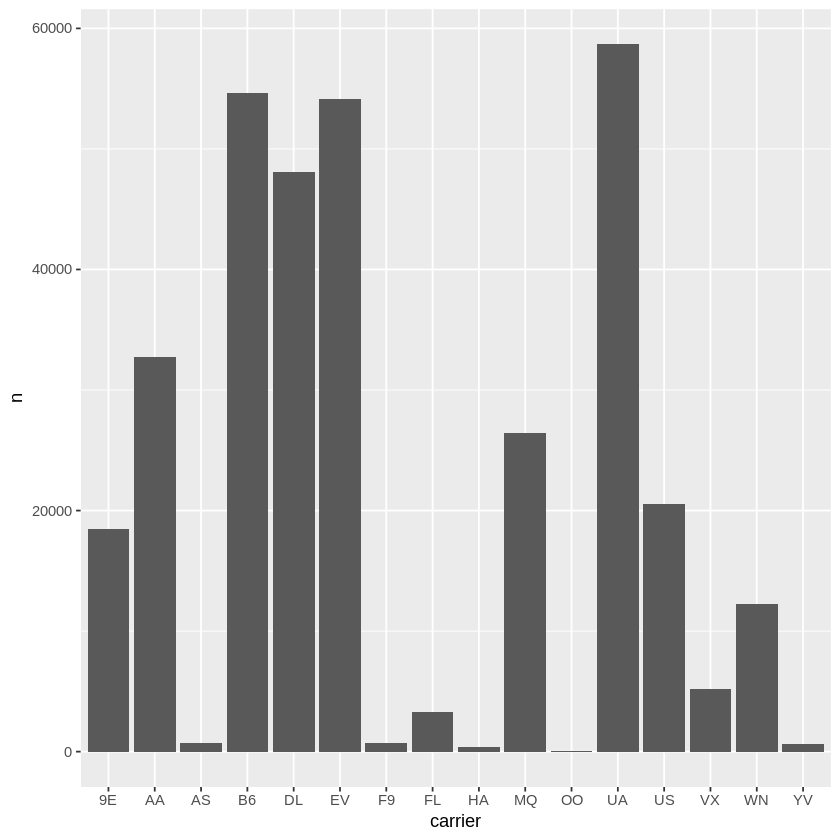

In [16]:
# OP 2
flights %>%
  count(carrier) %>%
  ggplot() +
  aes(x = carrier, y = n) +
  geom_bar(stat = "identity")


# Etiquetas en un gráfico de barras


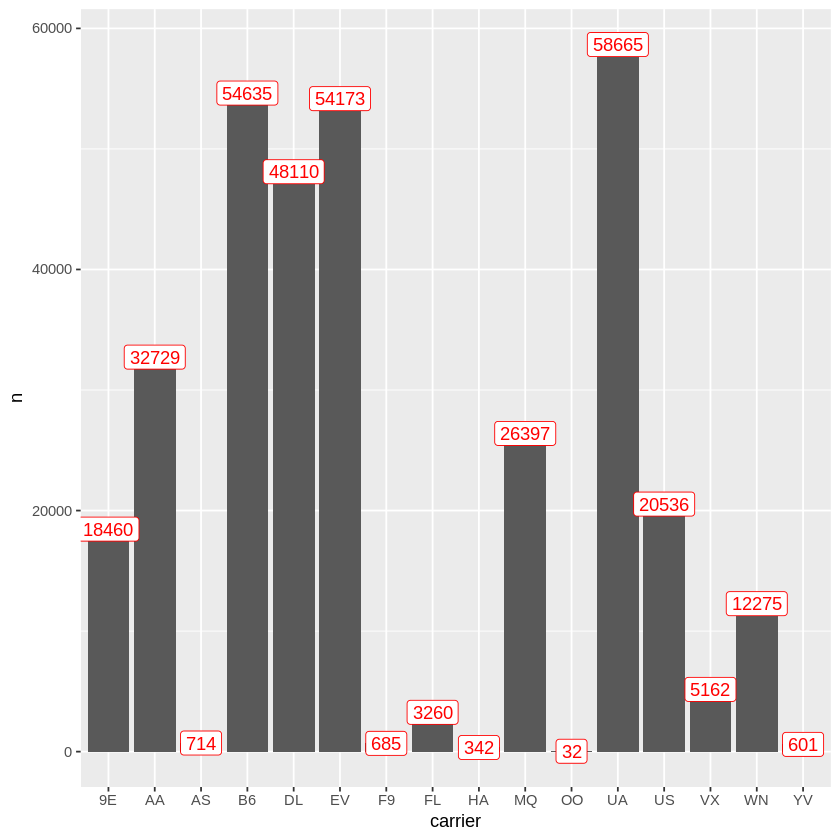

In [17]:
flights %>%
  count(carrier) %>%
  ggplot() +
  aes(x = carrier, y = n) +
  geom_bar(stat = "identity") +
  geom_label(aes(label = n), color = "red") # Recuerden que aquí vieron como añadir etiquetas en un grafico de barras.

In [18]:
head(flights)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00


3- Considere un gráfico con los totales de vuelos por aeropuerto de destino, pero solo muestre aeropuertos de destino de ranking 1, 10 y 20 (según su cantidad de vuelos, donde 1 representa al aeropuerto de destino con mayor cantidad de vuelos).

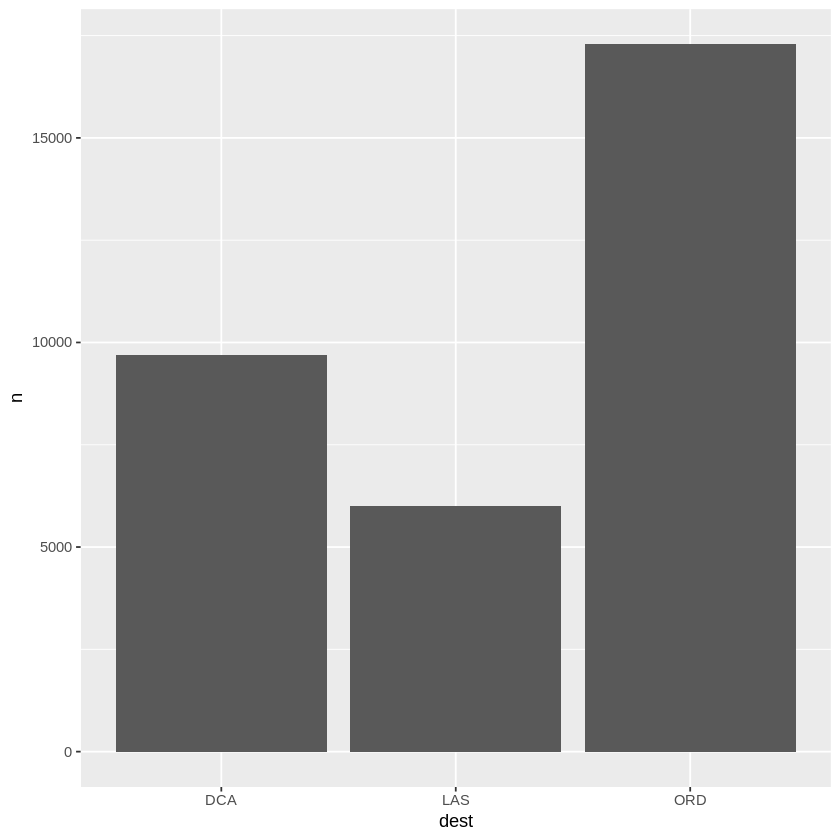

In [23]:
flights %>%
  count(dest) %>%
  arrange(desc(n)) %>%
  mutate(rk = row_number()) %>%
  filter(rk %in% c(1,10,20)) %>%
  ggplot() +
  aes(x = dest, y = n) +
  geom_bar(stat = "identity")

3.- Para los aeropuertos identificados en el punto dos, construir un gráfico de barras stackeado (stacked barchart) que muestre el total de vuelos por aeropuerto de origen.

In [33]:
total_dest <- flights %>%
  count(dest, name = "total_dest") %>%
  arrange(desc(total_dest)) %>%
  mutate(rk = row_number())

In [34]:
total_dest

dest,total_dest,rk
<chr>,<int>,<int>
ORD,17283,1
ATL,17215,2
LAX,16174,3
BOS,15508,4
MCO,14082,5
CLT,14064,6
SFO,13331,7
FLL,12055,8
MIA,11728,9


In [37]:
# OP1
flights %>%
  count(origin, dest, name = "total_orig_dest") %>%# filtrar donde dest in DCA, LAS y ORD NOOOO
  arrange(desc(dest)) %>%
  left_join(total_dest, by="dest") %>%
  filter(rk %in% c(1,10,20))

origin,dest,total_orig_dest,total_dest,rk
<chr>,<chr>,<int>,<int>,<int>
EWR,ORD,6100,17283,1
JFK,ORD,2326,17283,1
LGA,ORD,8857,17283,1
EWR,LAS,2010,5997,20
JFK,LAS,3987,5997,20
EWR,DCA,1719,9705,10
JFK,DCA,3270,9705,10
LGA,DCA,4716,9705,10


In [49]:
#OP2
aux <- flights %>%
  count(origin, dest, name = "total_orig_dest") %>%
  group_by(dest) %>%
  mutate(total_dest = sum(total_orig_dest)) %>%
  ungroup() %>% # Con esta funci{on le indicamos a R que no sonsidere los grupos definidos en group_by para las siguientes operaciones.
  mutate(rk = dense_rank(desc(total_dest))) %>%
  filter(rk %in% c(1,10,20)) %>%
  arrange(desc(total_dest))   # validar visualmente

aux

origin,dest,total_orig_dest,total_dest,rk
<chr>,<chr>,<int>,<int>,<int>
EWR,ORD,6100,17283,1
JFK,ORD,2326,17283,1
LGA,ORD,8857,17283,1
EWR,DCA,1719,9705,10
JFK,DCA,3270,9705,10
LGA,DCA,4716,9705,10
EWR,LAS,2010,5997,20
JFK,LAS,3987,5997,20


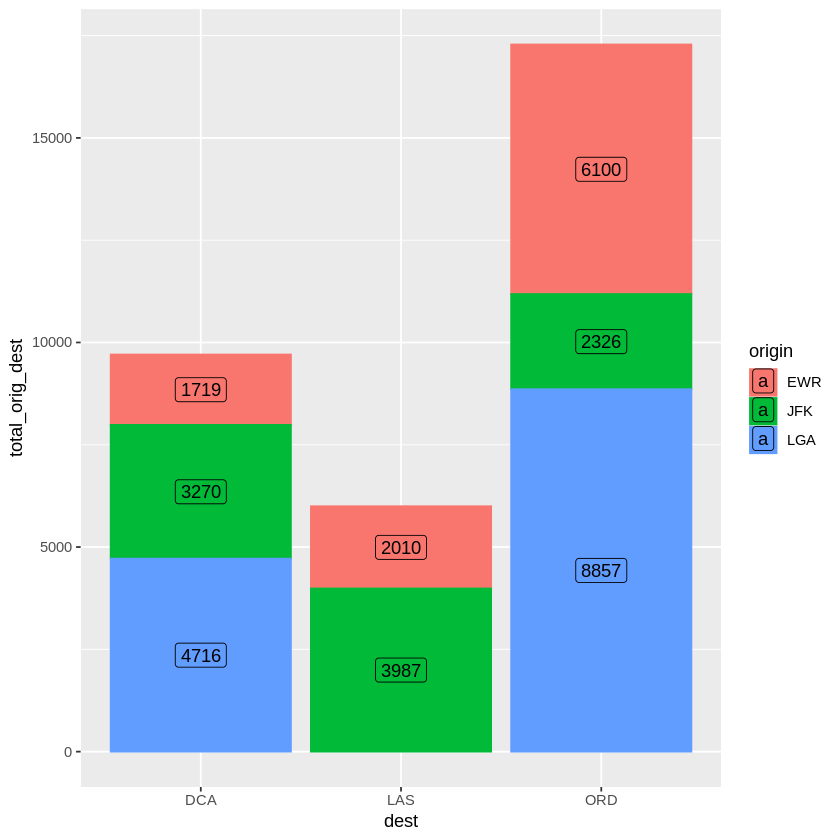

In [62]:
aux %>%
  ggplot() +
  aes(x = dest, y = total_orig_dest, color = origin, fill = origin) +
  geom_bar(stat = "identity") + # por defecto viene el stacked bar plot
  geom_label(mapping = aes(label = total_orig_dest), position = position_stack(vjust = 0.5) , color = "black")

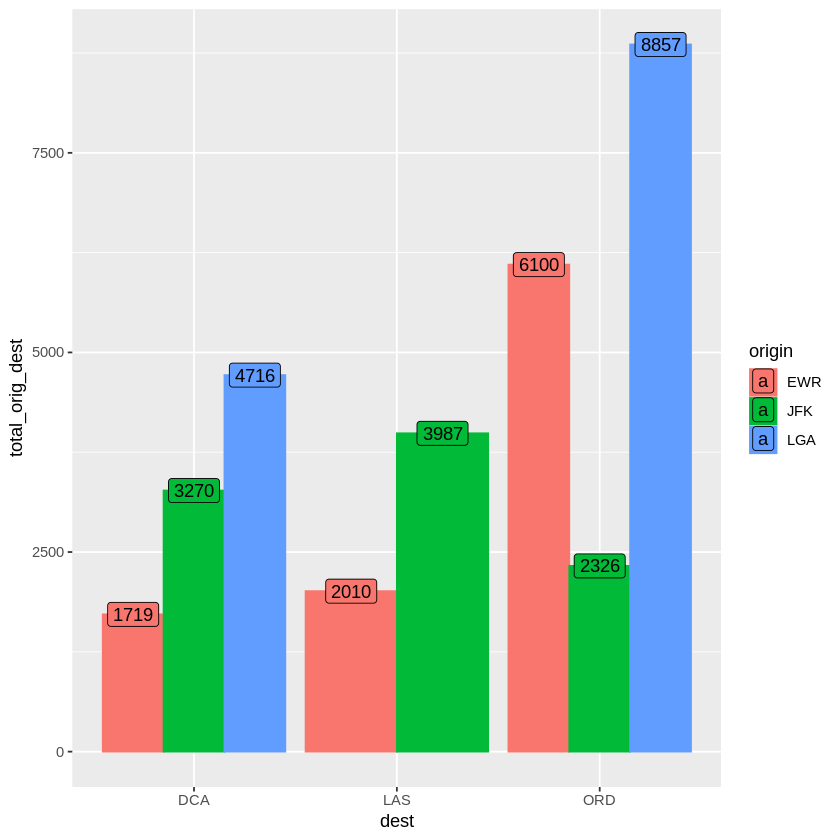

In [80]:
aux %>%
  ggplot() +
  aes(x = dest, y = total_orig_dest, color = origin, fill = origin) +
  geom_bar(stat = "identity", position = "dodge") +# por defecto viene el stacked bar plot
  geom_label(mapping = aes(label = total_orig_dest), position = position_dodge(width=0.9) , color = "black")

In [77]:
?position_dodge